In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from pathlib import Path
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
PATH = Path().parent


In [52]:
#import model
import torch
# Load model directly
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, AutoModel

# tokenizer2 = AutoTokenizer.from_pretrained("ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa")
# model = TFAutoModelForSequenceClassification.from_pretrained("ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa", from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [24]:
polarity_hash = {0: 'Positive', 2: 'Negative', 1: 'Neutral'}

In [50]:
# tokenizer2.save_pretrained(PATH/'tokenizer')
# model.save_pretrained(PATH/'model')

In [54]:
tokenizer3 = AutoTokenizer.from_pretrained(PATH/'tokenizer')
# model2 = AutoModel.from_pretrained(PATH/'model')

In [62]:
# Load model from config
from transformers import BertConfig
config = BertConfig.from_pretrained(PATH/'model/config.json')
model3 = TFAutoModelForSequenceClassification.from_pretrained(PATH/'model', config=config)



All PyTorch model weights were used when initializing TFBertForSequenceClassification.

All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


Output: [[9.9978215e-01 9.6162956e-05 1.2173225e-04]]


In [63]:
#Predict using model3
text = "Saya sangat senang hari ini"
encoded_input = tokenizer3(text, return_tensors='tf')
output = model3(encoded_input)
prediction = np.argmax(output.logits)
print(f"Output: {polarity_hash[prediction]}")

Output: Positive


In [65]:
#predicting

df = pd.read_csv(PATH/'dataset_KampusMengajar31May-3000 copy.csv')
df.head(5)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1796098592337199274,Thu May 30 08:37:30 +0000 2024,2,#MBKMKKP merupakan kegiatan belajar mengajar t...,1796098599572439083,NaN,bppsdm_kp,in,"GMB III Lt 5,6,7 KKP Jakarta",0,1,1,https://x.com/bppsdm_kp/status/179609859957243...,829868187625730048,bppsdm_kp
1,1796085875715006708,Thu May 30 07:46:57 +0000 2024,0,bingung anjay daftar kampus mengajar gak ya,1796085875715006708,NaN,NaN,in,NaN,0,0,0,https://x.com/uurrmars/status/1796085875715006708,1791319105179668480,uurrmars
2,1796080173546160617,Thu May 30 07:24:17 +0000 2024,0,[cm] PLISSSS NOTICE SENDER!!! sender semester ...,1796080173546160617,https://pbs.twimg.com/media/GOz1ZgtaMAAvAyY.jpg,NaN,in,NaN,0,9,0,https://x.com/collegemenfess/status/1796080173...,1046084008742801408,collegemenfess
3,1796072777004281961,Thu May 30 06:54:54 +0000 2024,0,sebel mau konsul buat kampus mengajar malah di...,1796072777004281961,NaN,NaN,in,NaN,0,0,0,https://x.com/xixixiitaaaaq/status/17960727770...,1396818646408650759,xixixiitaaaaq
4,1796050352841646108,Thu May 30 06:28:37 +0000 2024,0,@hcnlatte @SMTOWNGLOBAL @SMTOWN_Idn @NCTsmtown...,1796066163903922269,NaN,hcnlatte,in,she/her 02 homophobic dni!,0,1,0,https://x.com/citaelatte_/status/1796066163903...,1107653867313889280,citaelatte_


In [69]:
#Data preprocessing
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

def remove_special_characters(text):
    return re.sub(r'#[^a-zA-Z0-9\s]', '', text)

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_hashtags_mentions(text):
    return re.sub(r'[@#]\w+', '', text)

def remove_special(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

def remove_extra_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

def to_lowercase(text):
    return text.lower()

def clean_text(text):
    if isinstance(text, str):
        text = remove_urls(text)
        text = remove_special_characters(text)
        text = remove_hashtags_mentions(text)
        text = remove_special(text)
        text = remove_numbers(text)
        text = to_lowercase(text)
        text = remove_extra_whitespace(text)
        text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['cleaned_text'] = df['full_text'].apply(clean_text)
# df.head(5)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,cleaned_text
0,1796098592337199274,Thu May 30 08:37:30 +0000 2024,2,#MBKMKKP merupakan kegiatan belajar mengajar t...,1796098599572439083,NaN,bppsdm_kp,in,"GMB III Lt 5,6,7 KKP Jakarta",0,1,1,https://x.com/bppsdm_kp/status/179609859957243...,829868187625730048,bppsdm_kp,merupakan kegiatan belajar mengajar tdk hanya ...
1,1796085875715006708,Thu May 30 07:46:57 +0000 2024,0,bingung anjay daftar kampus mengajar gak ya,1796085875715006708,NaN,NaN,in,NaN,0,0,0,https://x.com/uurrmars/status/1796085875715006708,1791319105179668480,uurrmars,bingung anjay daftar kampus mengajar gak ya
2,1796080173546160617,Thu May 30 07:24:17 +0000 2024,0,[cm] PLISSSS NOTICE SENDER!!! sender semester ...,1796080173546160617,https://pbs.twimg.com/media/GOz1ZgtaMAAvAyY.jpg,NaN,in,NaN,0,9,0,https://x.com/collegemenfess/status/1796080173...,1046084008742801408,collegemenfess,cm plissss notice sender sender semester pgsd ...
3,1796072777004281961,Thu May 30 06:54:54 +0000 2024,0,sebel mau konsul buat kampus mengajar malah di...,1796072777004281961,NaN,NaN,in,NaN,0,0,0,https://x.com/xixixiitaaaaq/status/17960727770...,1396818646408650759,xixixiitaaaaq,sebel mau konsul buat kampus mengajar malah di...
4,1796050352841646108,Thu May 30 06:28:37 +0000 2024,0,@hcnlatte @SMTOWNGLOBAL @SMTOWN_Idn @NCTsmtown...,1796066163903922269,NaN,hcnlatte,in,she/her 02 homophobic dni!,0,1,0,https://x.com/citaelatte_/status/1796066163903...,1107653867313889280,citaelatte_,setau aku kampus mengajar ituuu kamuu bantuu k...


In [71]:

nltk.download('stopwords')
stemmer = StemmerFactory().create_stemmer()
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
def remove_stopwords(text):
    if isinstance(text, str):
        word_tokens = word_tokenize(text)
        filtered_sentence = [w for w in word_tokens if not w in stop_words]
        return ' '.join(filtered_sentence)
    return text

In [74]:
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)
# df.head(5)

In [83]:
def stemming(text):
    text = text.split()
    # print(text)
    stemmed = []
    for word in text:
        if(word == 'kampus' or word == 'mengajar'):
            stemmed.append(word)
        else:
            stemmed.append(stemmer.stem(word))
        
    return ' '.join(stemmed)

In [ ]:
df.iloc[0,df.columns.get_loc('cleaned_text')].split()

In [85]:
df['cleaned_text'] = df['cleaned_text'].apply(stemming)
df.head(5)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,cleaned_text
0,1796098592337199274,Thu May 30 08:37:30 +0000 2024,2,#MBKMKKP merupakan kegiatan belajar mengajar t...,1796098599572439083,NaN,bppsdm_kp,in,"GMB III Lt 5,6,7 KKP Jakarta",0,1,1,https://x.com/bppsdm_kp/status/179609859957243...,829868187625730048,bppsdm_kp,giat ajar mengajar tdk laksana kampusruang kel...
1,1796085875715006708,Thu May 30 07:46:57 +0000 2024,0,bingung anjay daftar kampus mengajar gak ya,1796085875715006708,NaN,NaN,in,NaN,0,0,0,https://x.com/uurrmars/status/1796085875715006708,1791319105179668480,uurrmars,bingung anjay daftar kampus mengajar gak ya
2,1796080173546160617,Thu May 30 07:24:17 +0000 2024,0,[cm] PLISSSS NOTICE SENDER!!! sender semester ...,1796080173546160617,https://pbs.twimg.com/media/GOz1ZgtaMAAvAyY.jpg,NaN,in,NaN,0,9,0,https://x.com/collegemenfess/status/1796080173...,1046084008742801408,collegemenfess,cm plissss notice sender sender semester pgsd ...
3,1796072777004281961,Thu May 30 06:54:54 +0000 2024,0,sebel mau konsul buat kampus mengajar malah di...,1796072777004281961,NaN,NaN,in,NaN,0,0,0,https://x.com/xixixiitaaaaq/status/17960727770...,1396818646408650759,xixixiitaaaaq,sebel konsul kampus mengajar sulit dosen pa
4,1796050352841646108,Thu May 30 06:28:37 +0000 2024,0,@hcnlatte @SMTOWNGLOBAL @SMTOWN_Idn @NCTsmtown...,1796066163903922269,NaN,hcnlatte,in,she/her 02 homophobic dni!,0,1,0,https://x.com/citaelatte_/status/1796066163903...,1107653867313889280,citaelatte_,tau kampus mengajar ituuu kamuu bantuu seko sd...


In [87]:
#Prediction
def predict_sentiment(text):
    encoded_input = tokenizer3(text, return_tensors='tf')
    output = model3(encoded_input)
    prediction = np.argmax(output.logits)
    return polarity_hash[prediction]

df['sentiment'] = df['cleaned_text'].apply(predict_sentiment)
df.head(5)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,cleaned_text,sentiment
0,1796098592337199274,Thu May 30 08:37:30 +0000 2024,2,#MBKMKKP merupakan kegiatan belajar mengajar t...,1796098599572439083,NaN,bppsdm_kp,in,"GMB III Lt 5,6,7 KKP Jakarta",0,1,1,https://x.com/bppsdm_kp/status/179609859957243...,829868187625730048,bppsdm_kp,giat ajar mengajar tdk laksana kampusruang kel...,Neutral
1,1796085875715006708,Thu May 30 07:46:57 +0000 2024,0,bingung anjay daftar kampus mengajar gak ya,1796085875715006708,NaN,NaN,in,NaN,0,0,0,https://x.com/uurrmars/status/1796085875715006708,1791319105179668480,uurrmars,bingung anjay daftar kampus mengajar gak ya,Negative
2,1796080173546160617,Thu May 30 07:24:17 +0000 2024,0,[cm] PLISSSS NOTICE SENDER!!! sender semester ...,1796080173546160617,https://pbs.twimg.com/media/GOz1ZgtaMAAvAyY.jpg,NaN,in,NaN,0,9,0,https://x.com/collegemenfess/status/1796080173...,1046084008742801408,collegemenfess,cm plissss notice sender sender semester pgsd ...,Neutral
3,1796072777004281961,Thu May 30 06:54:54 +0000 2024,0,sebel mau konsul buat kampus mengajar malah di...,1796072777004281961,NaN,NaN,in,NaN,0,0,0,https://x.com/xixixiitaaaaq/status/17960727770...,1396818646408650759,xixixiitaaaaq,sebel konsul kampus mengajar sulit dosen pa,Negative
4,1796050352841646108,Thu May 30 06:28:37 +0000 2024,0,@hcnlatte @SMTOWNGLOBAL @SMTOWN_Idn @NCTsmtown...,1796066163903922269,NaN,hcnlatte,in,she/her 02 homophobic dni!,0,1,0,https://x.com/citaelatte_/status/1796066163903...,1107653867313889280,citaelatte_,tau kampus mengajar ituuu kamuu bantuu seko sd...,Neutral


In [88]:
#save to excel

# df.to_excel(PATH/'sentiment_analysis_result.xlsx', index=False)

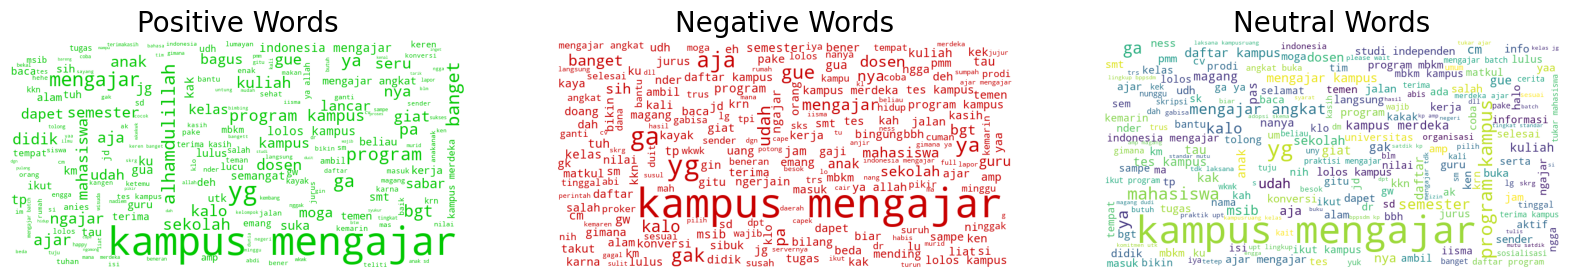

In [91]:
#Wordcloud
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import seaborn as sns

#positive words
positive_words = ' '.join(df[df['sentiment'] == 'Positive']['cleaned_text'])
positive_wordcloud = WordCloud(width=800, height=400, background_color ='white', color_func=lambda *args, **kwargs: (0,200,0)).generate(positive_words)

#negative words
negative_words = ' '.join(df[df['sentiment'] == 'Negative']['cleaned_text'])
negative_wordcloud = WordCloud(width=800, height=400, background_color ='white', color_func=lambda *args, **kwargs: (200,0,0)).generate(negative_words)

#neutral words
neutral_words = ' '.join(df[df['sentiment'] == 'Neutral']['cleaned_text'])
neutral_wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(neutral_words)

#plotting 3 wordclouds
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(positive_wordcloud)
ax[0].axis('off')
ax[0].set_title('Positive Words', fontsize=20)
ax[1].imshow(negative_wordcloud)
ax[1].axis('off')
ax[1].set_title('Negative Words', fontsize=20)
ax[2].imshow(neutral_wordcloud)
ax[2].axis('off')
ax[2].set_title('Neutral Words', fontsize=20)
plt.show()


In [92]:
# !pip freeze > requirements.txt

In [93]:
len(df)

3676

In [96]:
#show last data
df.tail(5)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,cleaned_text,sentiment
3671,1635994778532974593,Wed Mar 15 14:51:33 +0000 2023,0,@stadthuis belum seutuhnya heheh ini lagi ikut...,1636017293833682944,NaN,stadthuis,in,NaN,0,1,0,https://x.com/eveexr/status/1636017293833682944,1531935678748950528,eveexr,utuh heheh program kampus mengajar,Positive
3672,1635973508575662080,Wed Mar 15 12:12:15 +0000 2023,0,@UNYmfs Kalo pngn ikut mbkm kampus mengajar ta...,1635977204575395840,NaN,UNYmfs,in,NaN,0,1,0,https://x.com/Penggemarbola20/status/163597720...,1619155727310000131,Penggemarbola20,kalo pngn mbkm kampus mengajar daftar buka jul...,Neutral
3673,1635868897114222592,Wed Mar 15 12:08:26 +0000 2023,0,@Soleil_Raze Ah pantas saja sembari mencomot s...,1635976245052833793,NaN,Soleil_Raze,in,icon: wowgwo (twitter),0,1,0,https://x.com/consumru/status/1635976245052833793,1626085372345344000,consumru,ah sembari comot pie kotak sama gelasgelas teh...,Positive
3674,1635942358150795265,Wed Mar 15 11:39:13 +0000 2023,0,@xiyeoni Mau ke kampus kebetulan saya mengajar...,1635968893134032898,NaN,xiyeoni,in,"2000, TREASURE.",0,1,0,https://x.com/__Yoshiy/status/1635968893134032898,1421833580125118466,__Yoshiy,kampus mengajar statistika,Neutral
3675,1635829783937552385,Wed Mar 15 05:46:00 +0000 2023,0,@Elsen99771619 @lysavana1 dia bukan sekedar me...,1635880002825912320,NaN,Elsen99771619,in,NaN,0,2,0,https://x.com/kiran_basroni/status/16358800028...,1446676923795402755,kiran_basroni,dar mengajar kurikulum s biasasaya tdk suka ak...,Positive


Model: "tf_bert_for_sequence_classification_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  110617344 
                                                                 
 dropout_189 (Dropout)       multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 110619651 (421.98 MB)
Trainable params: 110619651 (421.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [2]:
df_check = pd.read_excel(PATH/'sentiment_analysis_result.xlsx')
df_check.head(5)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,cleaned_text,sentiment
0,1796098592337199104,Thu May 30 08:37:30 +0000 2024,2,#MBKMKKP merupakan kegiatan belajar mengajar t...,1796098599572439040,NaN,bppsdm_kp,in,"GMB III Lt 5,6,7 KKP Jakarta",0,1,1,https://x.com/bppsdm_kp/status/179609859957243...,829868187625730048,bppsdm_kp,giat ajar mengajar tdk laksana kampusruang kel...,Neutral
1,1796085875715006976,Thu May 30 07:46:57 +0000 2024,0,bingung anjay daftar kampus mengajar gak ya,1796085875715006976,NaN,NaN,in,NaN,0,0,0,https://x.com/uurrmars/status/1796085875715006708,1791319105179667968,uurrmars,bingung anjay daftar kampus mengajar gak ya,Negative
2,1796080173546160896,Thu May 30 07:24:17 +0000 2024,0,[cm] PLISSSS NOTICE SENDER!!! sender semester ...,1796080173546160896,https://pbs.twimg.com/media/GOz1ZgtaMAAvAyY.jpg,NaN,in,NaN,0,9,0,https://x.com/collegemenfess/status/1796080173...,1046084008742801024,collegemenfess,cm plissss notice sender sender semester pgsd ...,Neutral
3,1796072777004282112,Thu May 30 06:54:54 +0000 2024,0,sebel mau konsul buat kampus mengajar malah di...,1796072777004282112,NaN,NaN,in,NaN,0,0,0,https://x.com/xixixiitaaaaq/status/17960727770...,1396818646408651008,xixixiitaaaaq,sebel konsul kampus mengajar sulit dosen pa,Negative
4,1796050352841646080,Thu May 30 06:28:37 +0000 2024,0,@hcnlatte @SMTOWNGLOBAL @SMTOWN_Idn @NCTsmtown...,1796066163903921920,NaN,hcnlatte,in,she/her 02 homophobic dni!,0,1,0,https://x.com/citaelatte_/status/1796066163903...,1107653867313889024,citaelatte_,tau kampus mengajar ituuu kamuu bantuu seko sd...,Neutral


In [5]:
#check number of positive
df_check[df_check['sentiment'] == 'Neutral'].shape[0]

1822